In [ ]:
# ipynb is temporary (LIGHT USAGE)
# uses cuda, nvidia gpu support, doesn't even work.

# DO NOT RUN ALL, some are not necessary. Avoid choking the ram.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import cv2
import tensorflow as tf;

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.optimizers import SGD, Adam
from keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical #.np_utils
from keras import Input

2023-11-28 19:53:14.468251: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-28 19:53:14.518396: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 19:53:14.869610: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 19:53:14.871142: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 19:53:15.911323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [ ]:
# Read dataset (VERY HEAVY USAGE)
# https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
csv_file= pd.read_csv('dataset/A_Z Handwritten Data.csv').astype('float32')
dataset = pd.DataFrame(csv_file)

#kernel KEEPS DYING. (ram dying specifically)

In [ ]:
# information (MEDIUM USAGE)

# dataset.shape
# (372450, 785)
dataset.describe()
#dataset.head()


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [ ]:
# Dataset preparation phase (LIGHT USAGE)

# separation for x and y
x = dataset.drop('0', axis = 1)
y = dataset['0']

print(f'x: {x.shape}')
print(f'y: {y.shape}\n\n')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(f'x_train length: {len(x_train)}')
print(f'y_train length: {len(y_train)}')
print(f'x_test length: {len(x_test)}')
print(f'y_test length: {len(y_test)}')

# -- previous results

# x_train.shape
# (297960, 784)

# y_train.shape
# (297960,)

# x_test.shape
# (74490, 784)

# y_test.shape
# (74490,)

# 28x28 pixels specifically stated in the dataset

x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
y_train = np.reshape(y_train.values, (y_train.shape[0], 1))

#x_test = np.reshape(x_test.values, (x_test.shape[0], 1, 1))

print(f'\n{x_train.shape}')

# y_train.shape?
# y_test.shape?

print(f"{y_train.shape}")


x: (372450, 784)
y: (372450,)


x_train length: 297960
y_train length: 297960
x_test length: 74490
y_test length: 74490

(297960, 28, 28)
(297960, 1)


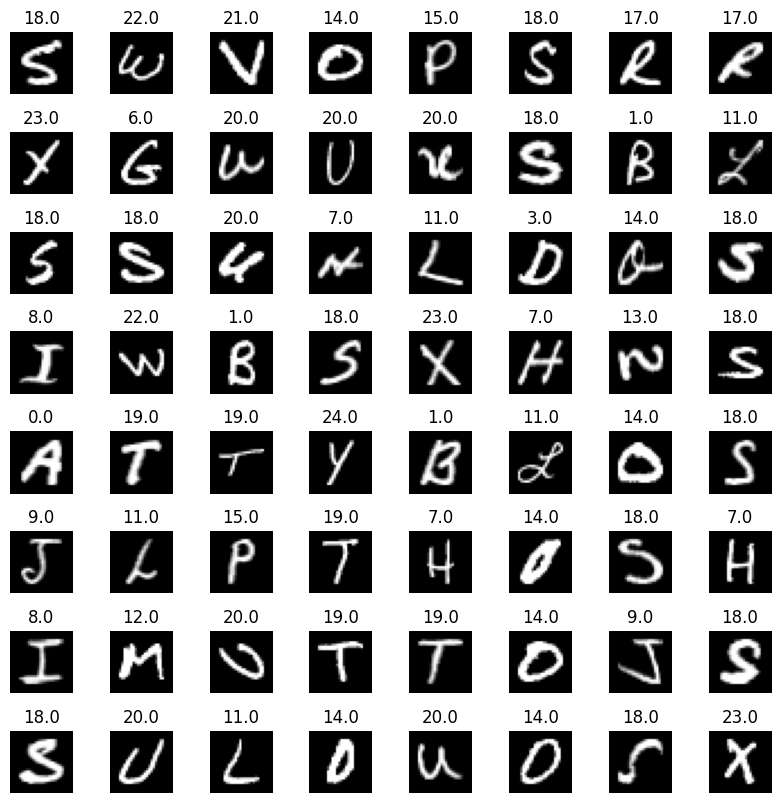

In [ ]:
# Visual of the dataset (LIGHT USAGE)

x2 = np.reshape(x, (x.shape[0], 28, 28, 1))
y2 = np.reshape(y, (y.shape[0], 1))
m,n,o,l= x2.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # INT randomizer
    random_index = np.random.randint(m)
    
    # Display the image
    ax.imshow(x2[random_index], cmap='gray')
    
    # Display the label above the image
    ax.set_title(y2[random_index,0]) # index 0, represents alphabets.
    
    ax.set_axis_off()

In [ ]:
# Layer Construction Phase (HEAVY USAGE)


print(f'{x_train.shape}')

# tf.random.set_seed(1234)
model = Sequential(
    [               
        tf.keras.Input(shape=(28,28)),
        
        #Dense(30, activation='relu', name='L1'), # 28
        Dense(128, activation='relu', name='L2'), # 14
        Dense(64, activation='relu', name='L3'), # 7
        Dense(1, activation='softmax', name='L4') # 1
        
    ], name = "my_model" 
)


(297960, 28, 28)


In [ ]:
# Training Phase (VERY HEAVY USAGE)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # learning_rate=1
)

model.fit(
    x_train, y_train,
    epochs=1 # iteration
)

: 

In [ ]:
# Saving model phase (LIGHT USAGE)

# model.save('./model/main.keras')



In [ ]:
# loaded_model = keras.models.load_model('your_model.h5')